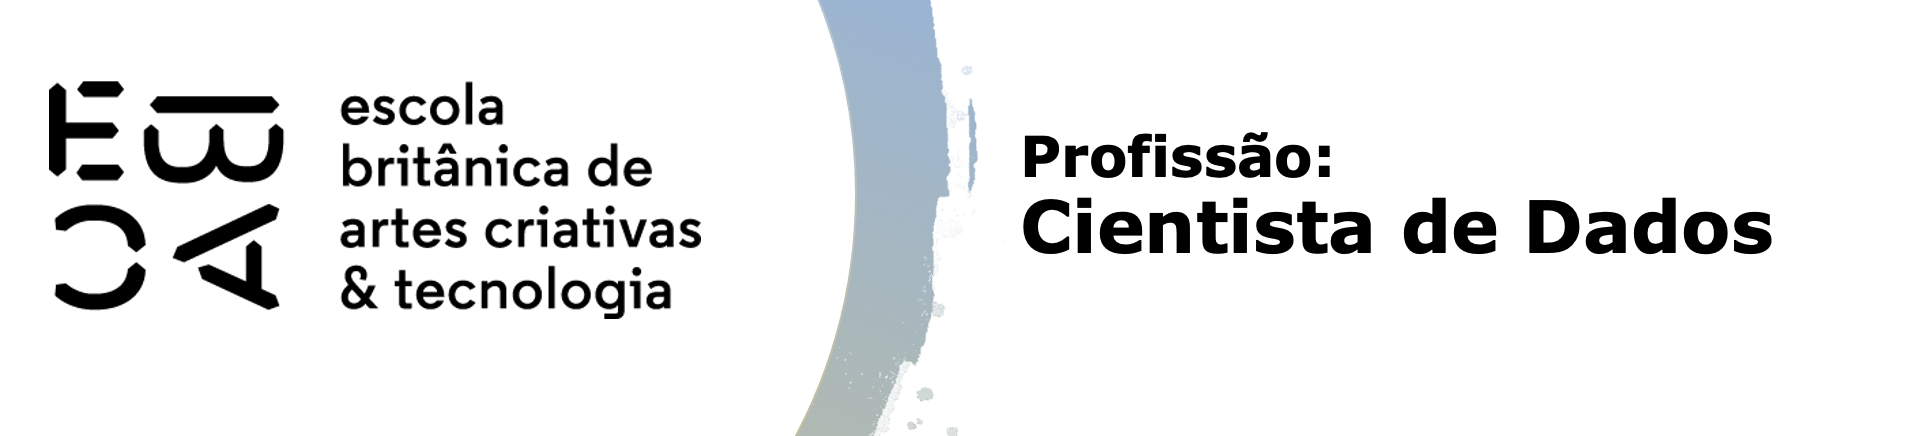

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Carregando a base features.txt em uma Series
with open('features.txt', 'r') as file:
    lines = file.readlines()
    features_series = pd.Series(lines).str.rstrip('\n')

# Carregando a base subject_train.txt em uma Series
subject_train_series = pd.read_csv("subject_train.txt", header=None)

# Carregando a base X_train.txt em um DataFrame
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)

# Definindo os nomes das colunas com base em features.txt
X_train.columns = features_series.tolist()

# Adicionando a coluna do identificador do indivíduo a X_train_df
X_train['subject_train_series'] = subject_train_series

# Criando um índice duplo com a ordem dos dados e o identificador do indivíduo
X_train.set_index([X_train.index, 'subject_train_series'], inplace=True)

# Carregando 'subject_test.txt' em uma Series
subject_test_series = pd.read_csv('subject_test.txt', header=None)

# Carregando 'X_test.txt' em um DataFrame
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None)

# Definindo os nomes das colunas com base em features.txt
X_test.columns = features_series.tolist()

# Adicionando a coluna subject_test como uma coluna em X_test_df
X_test['subject_test'] = subject_test_series

# Criando um índice duplo com a ordem dos dados e o identificador do indivíduo
X_test.set_index([X_test.index, 'subject_test'], inplace=True)

# Carregando os dados de treinamento
y_train = pd.read_csv('y_train.txt')

# Carregando os dados de teste
y_test = pd.read_csv('y_test.txt')

print(X_train)
print(X_test)

                           1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  \
     subject_train_series                                             
0    1                                0.288585            -0.020294   
1    1                                0.278419            -0.016411   
2    1                                0.279653            -0.019467   
3    1                                0.279174            -0.026201   
4    1                                0.276629            -0.016570   
...                                        ...                  ...   
7347 30                               0.299665            -0.057193   
7348 30                               0.273853            -0.007749   
7349 30                               0.273387            -0.017011   
7350 30                               0.289654            -0.018843   
7351 30                               0.351503            -0.012423   

                           3 tBodyAcc-mean()-Z  4 tBodyAcc-std()-X  \
     s

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [4]:
# Definindo os valores de ccp_alpha que deseja testar
ccp_alphas = np.linspace(0, 0.1, 100)  # Por exemplo, variando de 0 a 0.1

# Criando as listas para armazenar os resultados
train_scores = []
test_scores = []

# Definindo as "3 melhores variáveis" que identificamos no exercicio anterior
top_3_variaveis = ['53 tGravityAcc-min()-X',
 '390 fBodyAccJerk-bandsEnergy()-1,16',
 '560 angle(Y,gravityMean)']

# Suponha que top_3_variaveis seja uma lista com os nomes das variáveis selecionadas

# Loop pelos valores de ccp_alpha
for ccp_alpha in ccp_alphas:
    # Crie o modelo da árvore de decisão com o ccp_alpha atual
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, min_samples_leaf=20, random_state=42)

    # Treinando o modelo com os dados de treinamento
    clf.fit(X_train[top_3_variaveis], y_train)

    # Calculando a acurácia no conjunto de treinamento
    acuracia_train = clf.score(X_train[top_3_variaveis], y_train)
    train_scores.append(acuracia_train)

    # Calculando a acurácia no conjunto de teste
    acuracia_test = clf.score(X_test[top_3_variaveis], y_test)
    test_scores.append(acuracia_test)

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [5]:
# Os parâmetros do modelo, mantive os ccp_alphas da celula anterior e a quantidade minima de amostras em 20
param_grid = {
    'ccp_alpha': ccp_alphas,
    'min_samples_leaf': [20]
}

# Criando o modelo da árvore de decisão
dtc = DecisionTreeClassifier(random_state=42)

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# Realize o Grid Search com validação cruzada
grid_search.fit(X_train[top_3_variaveis], y_train)

# Obtenha os resultados
melhor_ccp_alpha = grid_search.best_params_['ccp_alpha']
melhor_acuracia = grid_search.best_score_

# Imprima os resultados
print(f"Melhor ccp_alpha: {melhor_ccp_alpha}")
print(f"Melhor acurácia: {melhor_acuracia}")


Melhor ccp_alpha: 0.012121212121212121
Melhor acurácia: 0.7822363945578232


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

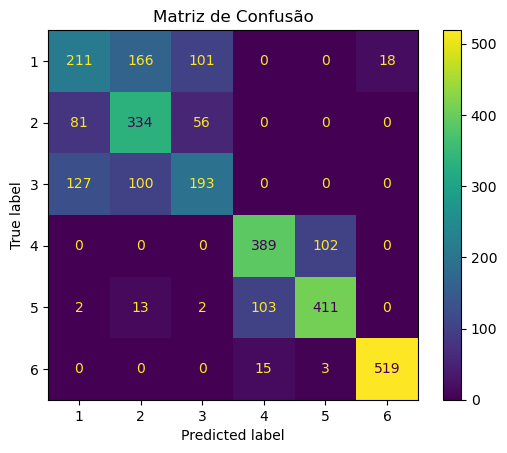

Acurácia na base de testes: 0.70


In [6]:
# Melhor ccp_alpha encontrado durante o Grid Search
melhor_ccp_alpha = grid_search.best_params_['ccp_alpha']

# Criando o modelo da árvore de decisão com o melhor ccp_alpha
melhor_arvore = DecisionTreeClassifier(ccp_alpha=melhor_ccp_alpha, min_samples_leaf=20, random_state=42)

# Treinando o modelo com toda a base de treino
melhor_arvore.fit(X_train[top_3_variaveis], y_train)

# Calcule a acurácia na base de testes
y_pred = melhor_arvore.predict(X_test[top_3_variaveis])
acuracia = accuracy_score(y_test, y_pred)

# Visualize a matriz de confusão
confusion_matrix = ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test[top_3_variaveis], y_test)
plt.title("Matriz de Confusão")
plt.show()

# Imprima a acurácia
print(f"Acurácia na base de testes: {acuracia:.2f}")

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Faça uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [7]:
# Inicialmente, é interessante testar uma quantidade maior de váriaveis, iremos verificar se com 6 variávies mais importantes
# Crie um modelo de árvore de decisão com profundidade máxima igual a 4
dtc_test = DecisionTreeClassifier(max_depth=4, random_state=42)

# Treine o modelo com os dados de treinamento
dtc_test.fit(X_train, y_train)

# Obtendo a importancia das variáveis
importancias_variaveis = dtc_test.feature_importances_

# Crie um dicionário que associe as importâncias às colunas
importancias = dict(zip(X_train.columns, importancias_variaveis))

# Ordenando as importâncias em ordem decrescente
variaveis_importantes = sorted(importancias.items(), key=lambda x: x[1], reverse=True)

# Selecione as três variáveis mais importantes, porém só com os nomes para evitar erros durante o treino
top_6_variaveis = [variavel for variavel, _ in variaveis_importantes[:6]]
top_9_variaveis = [variavel for variavel, _ in variaveis_importantes[:9]]

print(top_6_variaveis)
print(top_9_variaveis)

['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '560 angle(Y,gravityMean)', '509 fBodyAccMag-energy()', '70 tGravityAcc-arCoeff()-Y,1', '160 tBodyGyro-correlation()-Y,Z']
['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '560 angle(Y,gravityMean)', '509 fBodyAccMag-energy()', '70 tGravityAcc-arCoeff()-Y,1', '160 tBodyGyro-correlation()-Y,Z', '41 tGravityAcc-mean()-X', '133 tBodyGyro-min()-X', '380 fBodyAccJerk-skewness()-Z']


In [8]:
# Para facilitar o processamento e a comparação de resultados, carregarei as bases de dades de teste e treinamento somente com as 9 variáveis mais importantes
X_test_9var = pd.read_csv('X_test_9var.csv')
X_train_9var = pd.read_csv('X_train_9var.csv')

print(X_test_9var)
print(X_train_9var)


      Unnamed: 0  subject_test  53 tGravityAcc-min()-X  \
0              0             2                0.944461   
1              1             2                0.944461   
2              2             2                0.948704   
3              3             2                0.947309   
4              4             2                0.946221   
...          ...           ...                     ...   
2941        2941            24                0.903413   
2942        2942            24                0.903413   
2943        2943            24                0.903793   
2944        2944            24                0.903793   
2945        2945            24                0.909007   

      390 fBodyAccJerk-bandsEnergy()-1,16  560 angle(Y,gravityMean)  \
0                               -0.998040                  0.276801   
1                               -0.999641                  0.281343   
2                               -0.999954                  0.280083   
3                  

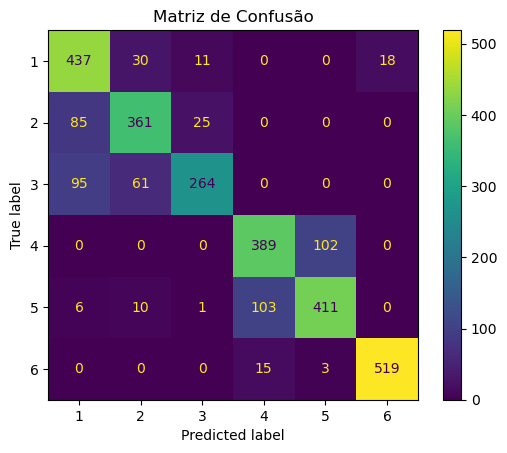

Melhor ccp_alpha: 0.013131313131313131
Melhor acurácia: 0.851743382135463
Acurácia na base de testes: 0.70


In [9]:
# Podemos retestar a arvore com as 6 variáveis
param_grid = {
    'ccp_alpha': ccp_alphas,
    'min_samples_leaf': [20]
}

# Criando o modelo da árvore de decisão
dtc_6_variaveis = DecisionTreeClassifier(random_state=42)

# Crie o objeto GridSearchCV
grid_search_6_variaveis = GridSearchCV(dtc_6_variaveis, param_grid, cv=10, scoring='accuracy')

# Realize o Grid Search com validação cruzada
grid_search_6_variaveis.fit(X_train_9var[top_6_variaveis], y_train)

# Obtenha os resultados
melhor_ccp_alpha_6_variaveis = grid_search_6_variaveis.best_params_['ccp_alpha']
melhor_acuracia_6_variaveis = grid_search_6_variaveis.best_score_

# Melhor ccp_alpha encontrado durante o Grid Search
melhor_ccp_alpha_6_variaveis = grid_search_6_variaveis.best_params_['ccp_alpha']

# Criando o modelo da árvore de decisão com o melhor ccp_alpha
melhor_arvore_6_variaveis = DecisionTreeClassifier(ccp_alpha=melhor_ccp_alpha_6_variaveis, min_samples_leaf=20, random_state=42)

# Treinando o modelo com toda a base de treino
melhor_arvore_6_variaveis.fit(X_train_9var[top_6_variaveis], y_train)

# Calcule a acurácia na base de testes
y_pred_6_variaveis = melhor_arvore_6_variaveis.predict(X_test_9var[top_6_variaveis])
acuracia_6_variaveis = accuracy_score(y_test, y_pred)

# Visualize a matriz de confusão
confusion_matrix_6_variaveis = ConfusionMatrixDisplay.from_estimator(melhor_arvore_6_variaveis, X_test[top_6_variaveis], y_test)
plt.title("Matriz de Confusão")
plt.show()

# Imprima os resultados
print(f"Melhor ccp_alpha: {melhor_ccp_alpha_6_variaveis}")
print(f"Melhor acurácia: {melhor_acuracia_6_variaveis}")

# Imprima a acurácia
print(f"Acurácia na base de testes: {acuracia_6_variaveis:.2f}")

In [10]:
# Podemos retestar a arvore com as 9 variáveis
param_grid = {
    'ccp_alpha': ccp_alphas,
    'min_samples_leaf': [20]
}

# Criando o modelo da árvore de decisão
dtc_9_variaveis = DecisionTreeClassifier(random_state=42)

# Crie o objeto GridSearchCV
grid_search_9_variaveis = GridSearchCV(dtc_9_variaveis, param_grid, cv=10, scoring='accuracy')

# Realize o Grid Search com validação cruzada
grid_search_9_variaveis.fit(X_train_9var[top_9_variaveis], y_train)

# Obtenha os resultados
melhor_ccp_alpha_9_variaveis = grid_search_9_variaveis.best_params_['ccp_alpha']
melhor_acuracia_9_variaveis = grid_search_9_variaveis.best_score_

# Melhor ccp_alpha encontrado durante o Grid Search
melhor_ccp_alpha_9_variaveis = grid_search_9_variaveis.best_params_['ccp_alpha']

# Criando o modelo da árvore de decisão com o melhor ccp_alpha
melhor_arvore_9_variaveis = DecisionTreeClassifier(ccp_alpha=melhor_ccp_alpha_9_variaveis, min_samples_leaf=20, random_state=42)

# Treinando o modelo com toda a base de treino
melhor_arvore_9_variaveis.fit(X_train_9var[top_6_variaveis], y_train)

# Calcule a acurácia na base de testes
y_pred_9_variaveis = melhor_arvore_9_variaveis.predict(X_test_9var[top_9_variaveis])
acuracia_9_variaveis = accuracy_score(y_test, y_pred)

# Visualize a matriz de confusão
confusion_matrix_9_variaveis = ConfusionMatrixDisplay.from_estimator(melhor_arvore_9_variaveis, X_test_9var[top_9_variaveis], y_test)
plt.title("Matriz de Confusão")
plt.show()

# Imprima os resultados
print(f"Melhor ccp_alpha: {melhor_ccp_alpha_9_variaveis}")
print(f"Melhor acurácia: {melhor_acuracia_9_variaveis}")

# Imprima a acurácia
print(f"Acurácia na base de testes: {acuracia_9_variaveis:.2f}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 133 tBodyGyro-min()-X
- 380 fBodyAccJerk-skewness()-Z
- 41 tGravityAcc-mean()-X
